# ロジスティック回帰 (logstic regression)

## シグモイド関数(ロジスティック関数)のプロット

シグモイド関数(ロジスティック関数)


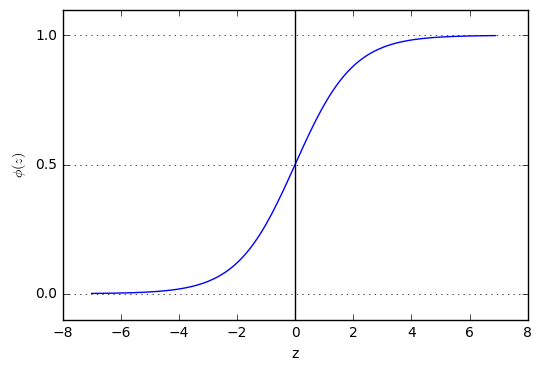

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# シグモイド関数の定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1間隔で-7〜7のデータを作成
z = np.arange(-7, 7, 0.1)
# 生成した範囲でのシグモイド関数を実行
phi_z = sigmoid(z)

# シグモイド関数の出力をプロット
plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # 垂直線を追加(z = 0)
plt.ylim(-0.1, 1.1) # y軸の上限下限の設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y軸の目盛を表示
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

print('シグモイド関数(ロジスティック関数)')
plt.show()

## ロジスティック回帰の実装 (scikit-learn)

In [6]:
# Irisデータのロード
import lib
X_train_std, X_test_std, y_train, y_test = lib.load_iris_data()

In [7]:
# ロジスティック回帰でトレーニング
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

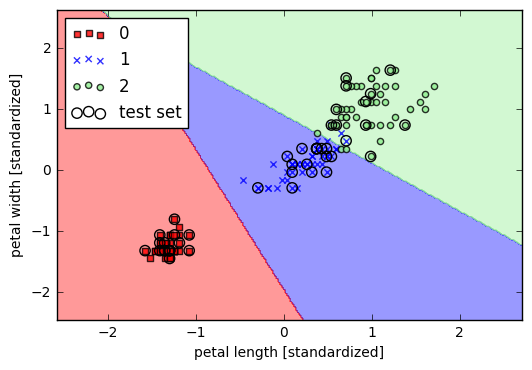

In [8]:
# トレーニングデータとテストデータを行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 決定境界のプロット
lib.plot_decision_regions(X=X_combined_std, y=y_combined,
                                        classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [9]:
# サンプルの所属関係の確率を予測する
#X_test_std[0, :].reshape(-1, 1)
lr.predict_proba(X_test_std[0, :])

/Users/nipe/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])